<a href="https://colab.research.google.com/github/IreneJeong/Project-Storage/blob/main/mls_cw_rs_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported.
169001437/169001437 [==============================] - 3s 0us/step
input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Image variables initialisation
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 256)      1024      
 ormalization)                                                   
                                                        

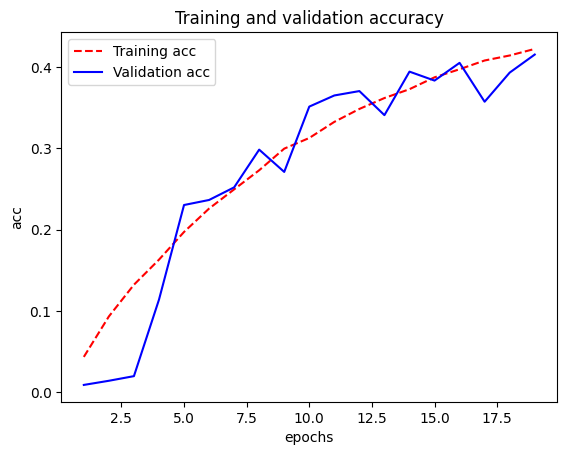

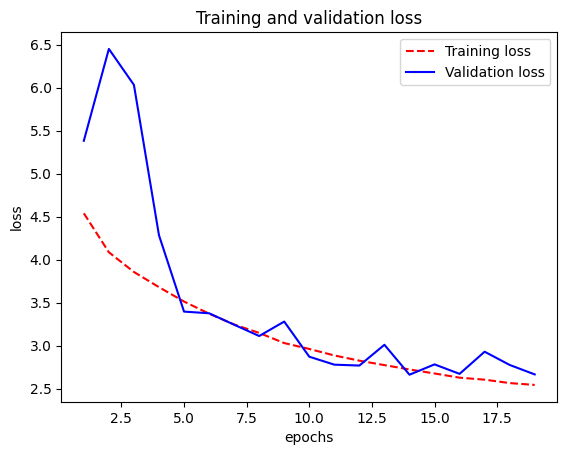

<Figure size 640x480 with 0 Axes>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 13 22:17:11 2023

@author: jeongdahye
"""

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import BatchNormalization
from keras import regularizers
import keras
# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')


# Random seed 
import random
import tensorflow as tf
import os


def set_seed(seed=42):
    '''
    Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

# Data Preprocessing 
from tensorflow.keras.datasets import cifar100
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar100.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))

# output data one-hot encoding : Only for small number of classes(CIFAR10 )
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

validation_split= 0.2
ptimizer= 'Adam'
momentum= 0.9
learning_rate= 0.001
l2= 0.0001
l1= 0.0001
epochs= 20
dropout= 0.5
decay= 1e-06
batch_size= 256
No_of_Units_in_dense_layers= 512
Conv2d_filters= 256
activation="relu"

#model sequential
model = Sequential()
    
# input layer
model.add(Conv2D(Conv2d_filters, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(BatchNormalization())
    
# Hidden Layer
model.add(Conv2D(Conv2d_filters, (3, 3), padding="same"))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(dropout))
model.add(BatchNormalization())
        
model.add(Conv2D(Conv2d_filters, (3, 3), padding="same"))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(dropout))
model.add(BatchNormalization())
        
    
# Output Layer
model.add(Flatten())
model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
model.add(Dropout(dropout))
model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
model.add(Dropout(dropout))

model.add(Dense(units=512,activation=activation))     
model.add(Dense(units=N_CLASSES, activation='softmax'))
        

opt = keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)

    
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


from tensorflow.keras.callbacks import EarlyStopping

# define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', # monitor validation loss
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs with no improvement after which training will be stopped
    verbose=1 # prints a message when early stopping is triggered
)

history = model.fit(input_X_train, output_y_train, 
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split, 
                    verbose=1, callbacks=[earlystop_callback])


#Define the function for plotting the history of the training of the model
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    
    
plot_history(history)
test_loss,test_acc=model.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 13 22:17:11 2023

@author: jeongdahye
"""

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.layers import BatchNormalization
from keras import regularizers
import keras
# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')


# Random seed 
import random
import tensorflow as tf
import os


def set_seed(seed=42):
    '''
    Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.
    '''
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

# Data Preprocessing 
from tensorflow.keras.datasets import cifar10
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

IMG_CHANNELS = 3
IMAGE_SIZE = input_X_train.shape[1]

print('Image variables initialisation')

N_CLASSES =len(np.unique(output_y_train))

# output data one-hot encoding : Only for small number of classes(CIFAR10 )
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

validation_split= 0.2
ptimizer= 'Adam'
momentum= 0.9
learning_rate= 0.001
l2= 0.0001
l1= 0.0001
epochs= 20
dropout= 0.5
decay= 1e-06
batch_size= 256
No_of_Units_in_dense_layers= 512
Conv2d_filters= 256
activation="relu"

#model sequential
model = Sequential()
    
# input layer
model.add(Conv2D(Conv2d_filters, (3,3), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(BatchNormalization())
    
# Hidden Layer
model.add(Conv2D(Conv2d_filters, (3, 3), padding="same"))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(dropout))
model.add(BatchNormalization())
        
model.add(Conv2D(Conv2d_filters, (3, 3), padding="same"))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(dropout))
model.add(BatchNormalization())
        
    
# Output Layer
model.add(Flatten())
model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
model.add(Dropout(dropout))
model.add(Dense(units=No_of_Units_in_dense_layers,activation=activation, kernel_regularizer=regularizers.l2(l2),
                  activity_regularizer=regularizers.l1(l1)))
model.add(Dropout(dropout))

model.add(Dense(units=512,activation=activation))     
model.add(Dense(units=N_CLASSES, activation='softmax'))
        

opt = keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)

    
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


from tensorflow.keras.callbacks import EarlyStopping

# define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', # monitor validation loss
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs with no improvement after which training will be stopped
    verbose=1 # prints a message when early stopping is triggered
)

history = model.fit(input_X_train, output_y_train, 
                    batch_size=batch_size, epochs=epochs, validation_split=validation_split, 
                    verbose=1, callbacks=[earlystop_callback])


#Define the function for plotting the history of the training of the model
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    
    
plot_history(history)
test_loss,test_acc=model.evaluate(input_X_test, output_y_test, verbose=2)

print("test accuracy: ",test_acc)
